In [90]:
pip install requests


In [91]:
pip install owslib


In [92]:
pip install numpy

In [93]:
# Using requests library to send GET request to server
import requests

result = requests.get("https://inspire.rasdaman.org/rasdaman/ows?service=WCS&version=2.0.1&request=GetCapabilities")

# Result is XML text (you need to parse it manually to extract valuable information
# such as: coverage Id, dimensions, axis labels,...)
print (result.text)

<?xml version="1.0" encoding="UTF-8"?>
<wcs:Capabilities version="2.0.1"
    xmlns:crs="http://www.opengis.net/wcs/service-extension/crs/1.0"
    xmlns:gml="http://www.opengis.net/gml/3.2"
    xmlns:int="http://www.opengis.net/wcs/interpolation/1.0"
    xmlns:ows="http://www.opengis.net/ows/2.0"
    xmlns:rasdaman="http://www.rasdaman.org"
    xmlns:swe="http://www.opengis.net/swe/2.0"
    xmlns:wcs="http://www.opengis.net/wcs/2.0"
    xmlns:xlink="http://www.w3.org/1999/xlink"
    xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.opengis.net/wcs/2.0 http://schemas.opengis.net/wcs/2.0/wcsGetCapabilities.xsd">
    <ows:ServiceIdentification>
        <ows:Title>rasdaman</ows:Title>
        <ows:Abstract>Inspire demonstration service based on rasdaman</ows:Abstract>
        <ows:ServiceType>OGC WCS</ows:ServiceType>
        <ows:ServiceTypeVersion>2.0.1</ows:ServiceTypeVersion>
        <ows:ServiceTypeVersion>2.1.0</ows:ServiceTypeVersion>
        <ows:P

In [94]:
# Get result of GetCapabilities request from Rasdaman demo server

from owslib.wcs import WebCoverageService

my_wcs = WebCoverageService("https://inspire.rasdaman.org/rasdaman/ows", version="2.0.1")
                            
# Print all available coverages                    
print (my_wcs.contents.keys())

dict_keys(['AvgLandTemp', 'AvgTemperatureColorScaled', 'FiLCCoverageBit', 'INSPIRE_EL', 'INSPIRE_LC', 'INSPIRE_LC_Metadata', 'INSPIRE_OI_IR', 'INSPIRE_OI_RGB', 'INSPIRE_WNZ_5_NAP', 'dgm10', 'mean_summer_airtemp', 'sen2irc8b', 'sen2rgb8b'])


In [95]:
# Select a coverage (3D irregular coverage) to describe and set it to a reference variable
cov = my_wcs.contents["AvgTemperatureColorScaled"]
# Get number of dimensions of coverage
print (cov.grid.dimension)

3


In [96]:
# Get coverage axis labels with order according to coverage's Coordinate Reference System (CRS)
print (cov.grid.axislabels)

['Lat', 'Long', 'ansi']


In [97]:
# Get coverage's time axis's domain (as this coverage is 3D with time axis)
print (cov._getTimeLimits())

[datetime.datetime(2000, 2, 1, 0, 0), datetime.datetime(2015, 7, 1, 0, 0)]


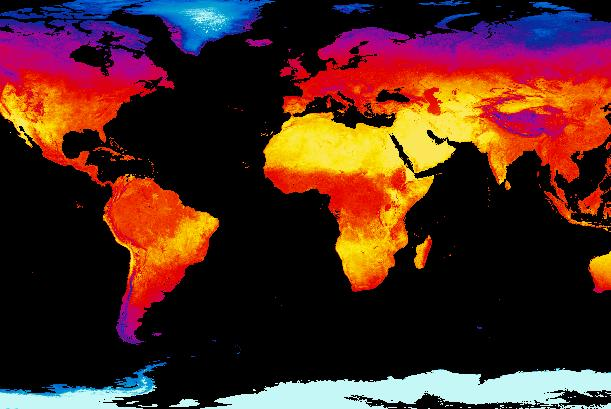

In [98]:
import requests
from IPython.display import Image

# Get a subset coverage by slicing on time axis, trimming on Lat and Long axes, then encode result in image/png.
request = "&REQUEST=GetCoverage"
coverage_id = "&COVERAGEID=AvgTemperatureColorScaled"
subset_time = "&SUBSET=ansi(\"2002-09-01T00:00:00.000Z\")"
subset_lat = "&SUBSET=Lat(-81.7242,81.7825)"
subset_long = "&SUBSET=Lon(-122.1420,122.2185)"
encode_format = "&FORMAT=image/jpeg"

response = requests.get("http://ows.rasdaman.org/rasdaman/ows?&SERVICE=WCS&VERSION=2.0.1"
                       + request + coverage_id + subset_time + subset_lat + subset_long + encode_format)

# Display result directly (sea coastnear by Fiucimino)
Image(data=response.content)

In [99]:
pip install Pillow

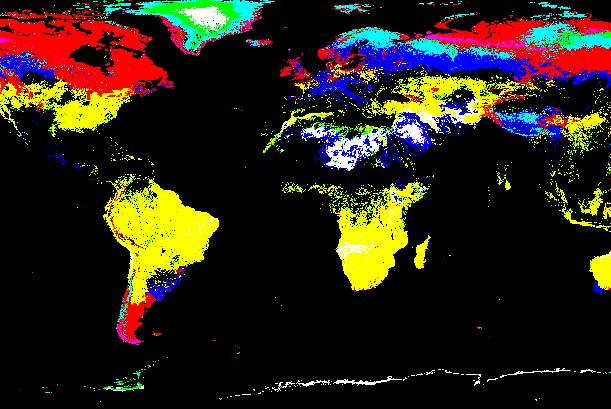

In [100]:
import requests
from IPython.display import Image


query = '''
<?xml version="1.0" encoding="UTF-8" ?><ProcessCoveragesRequest xmlns="http://www.opengis.net/wcps/1.0" service="WCPS" version="1.0.0">  <query>    <abstractSyntax>        
for $c in (AvgTemperatureColorScaled) 
        return encode( 
                ($c[Lat(-81.7242:81.7825), Lon(-122.1420:122.2185), ansi("2002-09-01T00:00:00.000Z")]
                 - $c[Lat(-81.7242:81.7825), Lon(-122.1420:122.2185), ansi("2009-05-01T00:00:00.000Z")])
                 * 200, "jpeg") 
</abstractSyntax>  </query></ProcessCoveragesRequest>
'''

# Send a WCPS with special characters to server in POST request

url = 'https://inspire.rasdaman.org/rasdaman/ows'

response = requests.post(url, data = query)

Image(data=response.content)


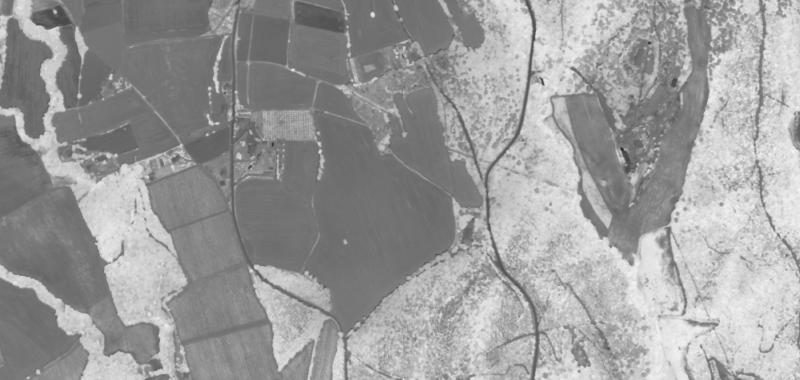

In [101]:
import requests
from IPython.display import Image


query = '''
<?xml version="1.0" encoding="UTF-8" ?><ProcessCoveragesRequest xmlns="http://www.opengis.net/wcps/1.0" service="WCPS" version="1.0.0">  <query>    <abstractSyntax>      
for $ir in (INSPIRE_OI_IR)
        return encode(
              (unsigned char) (127*( 1 + ((float) $ir.red - $ir.green)/((float) $ir.red + $ir.green) ) ) [E(480000:482000), N(4651150:4652100)],
         "jpeg")    
         </abstractSyntax>  </query></ProcessCoveragesRequest>
'''

# Send a WCPS with special characters to server in POST request

url = 'https://inspire.rasdaman.org/rasdaman/ows'

response = requests.post(url, data = query)

Image(data=response.content)